## Ridge and LAsso Regression implementation

In [1]:
from sklearn.datasets import load_boston

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=load_boston()

In [4]:
df.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
from pprint import pprint
pprint(df['DESCR'])


('.. _boston_dataset:\n'
 '\n'
 'Boston house prices dataset\n'
 '---------------------------\n'
 '\n'
 '**Data Set Characteristics:**  \n'
 '\n'
 '    :Number of Instances: 506 \n'
 '\n'
 '    :Number of Attributes: 13 numeric/categorical predictive. Median Value '
 '(attribute 14) is usually the target.\n'
 '\n'
 '    :Attribute Information (in order):\n'
 '        - CRIM     per capita crime rate by town\n'
 '        - ZN       proportion of residential land zoned for lots over 25,000 '
 'sq.ft.\n'
 '        - INDUS    proportion of non-retail business acres per town\n'
 '        - CHAS     Charles River dummy variable (= 1 if tract bounds river; '
 '0 otherwise)\n'
 '        - NOX      nitric oxides concentration (parts per 10 million)\n'
 '        - RM       average number of rooms per dwelling\n'
 '        - AGE      proportion of owner-occupied units built prior to 1940\n'
 '        - DIS      weighted distances to five Boston employment centres\n'
 '        - RAD      index of 

In [6]:
dataset = pd.DataFrame(df.data)
print(dataset.head())

        0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  


In [7]:
dataset.columns=df.feature_names

In [8]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
df.target.shape

(506,)

In [10]:
dataset["Price"]=df.target

In [11]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [12]:
X=dataset.iloc[:,:-1] ## independent features
y=dataset.iloc[:,-1] ## dependent features

## Linear Regression


In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

lin_regressor=LinearRegression()
mse=cross_val_score(lin_regressor,X,y,scoring='neg_mean_squared_error',cv=5)
mean_mse=np.mean(mse)
print(mean_mse)

-37.13180746769922


## Ridge Regression

In [14]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [15]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 100}
-29.905701947540383


## Lasso Regression

In [16]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X,y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

C:\Users\husssabe\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4430.746729651311, tolerance: 3.9191485420792076
  model = cd_fast.enet_coordinate_descent(
C:\Users\husssabe\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4397.459304778431, tolerance: 3.3071316790123455
  model = cd_fast.enet_coordinate_descent(
C:\Users\husssabe\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3796.653037433508, tolerance: 2.813643886419753
  model = cd_fast.enet_coordinate_descent(
C:\Users\husssabe\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Con

{'alpha': 1}
-35.531580220694856


### Just because losso gives higher value than ridge it doesnt mean ridge is good. Lasso works well when we have many features as it removed unwanted features

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [18]:
prediction_lasso=lasso_regressor.predict(X_test)
prediction_ridge=ridge_regressor.predict(X_test)

C:\Users\husssabe\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

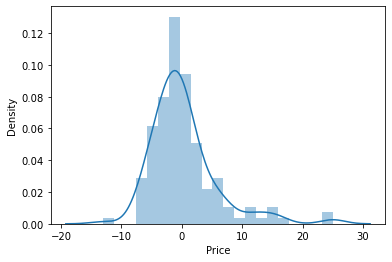

In [19]:
import seaborn as sns

sns.distplot(y_test-prediction_lasso)

<AxesSubplot:xlabel='Price', ylabel='Density'>

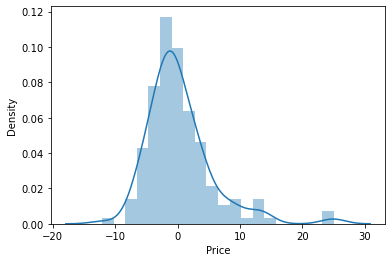

In [22]:
import seaborn as sns

sns.distplot(y_test-prediction_ridge)

Looking at both graphs ridge performs well compared to lasso. as the graph is more stable.